# Breast Cancer Classification

## Business Understanding

The goal of this analysis is to leverage data from the Breast Cancer Wisconsin (Diagnostic) dataset to improve diagnostic accuracy and ultimately patient outcomes. This dataset provides features computed from digitized images of fine needle aspirates (FNAs) of breast masses and captures critical information that can help distinguish between malignant and benign tumors.

### Key Points

- **Objective:** 
    - Develop a predictive model to assist radiologists and medical professionals in accurately classifying breast tumors.
    - Enhance early detection and diagnosis, potentially leading to improved treatment plans and patient survival rates.

- **Business Impact:**
    - **Cost Reduction:** Accurate diagnostics can lower unnecessary biopsies and other invasive procedures, thus reducing healthcare costs.
    - **Efficiency:** Automating the diagnostic process minimizes human error and accelerates decision-making.
    - **Patient Care:** Early and precise identification of cancerous tumors can lead to timely interventions, improving patient outcomes and reducing mortality rates.

- **Strategic Benefits:**
    - **Competitive Advantage:** Healthcare institutions can differentiate themselves by offering cutting-edge, data-driven diagnostic solutions.
    - **Resource Allocation:** Optimized diagnostics allow for more precise resource allocation in healthcare settings, ensuring focused care where it's most needed.

- **Rationale:**
    - The dataset’s rich feature set offers an opportunity to explore advanced analytical techniques including machine learning. Using these methods can complement expert opinions and contribute to better risk assessment and treatment strategies.

This business understanding sets the stage for the technical exploration and model development, directly linking the analytical outcomes with tangible benefits in healthcare management and patient services.

## Data Understanding

The Breast Cancer Wisconsin (Diagnostic) dataset contains 569 instances of tumors, each characterized by 30 features. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass and describe characteristics of the cell nuclei present in the image.

### Features

1. **ID number**
2. **Diagnosis (M = malignant, B = benign)**
3. **Ten real-valued features are computed for each cell nucleus:**
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

- **Diagnosis (Target Variable):**
    - Malignant (M): Indicates the presence of cancerous cells. 212 instances.
    - Benign (B): Indicates the absence of cancerous cells. 357 instances.

Dataset Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)



## How do I solve this problem?

1. Support Vector Machine Classifier (SVM)

In this dataset, we have a binary classification problem where we need to predict whether a tumor is malignant or benign. SVM is a powerful classification algorithm that can be used to solve this problem. It works by finding the hyperplane that best separates the classes in the feature space. The hyperplane is chosen to maximize the margin between the classes, which helps improve the generalization performance of the model.

2. Grid Search for Hyperparameter Tuning

SVM has several hyperparameters that can be tuned to improve the performance of the model. Grid search is a technique that can be used to search through a grid of hyperparameters and find the best combination that maximizes the performance of the model. By using grid search, we can find the optimal hyperparameters for the SVM model and improve its accuracy.

## Data Preparation

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [4]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Data Understanding


In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df_cancer["target"].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

In [7]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
df_cancer.shape

(569, 31)

In [9]:
def grab_col_names(dataframe, categorical_threshold=10, cardinal_threshold=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal,nominal variables in the data set.
    Note: Categorical variables but numerical variables are also included in categorical variables.

    Parameters
    ----------
    dataframe : dataframe
        The dataframe from which variables names are to be retrieved.
    categorical_threshold : int, optional
        class threshold for numeric but categorical variables
    cardinal_threshold : int, optional
        Class threshold for categorical but cardinal variables

    Returns
    -------
        categorical_cols : list
            Categorical variable list
        numerical_cols : list
            Numerical variable list
        cardinal_cols : list
            Categorical looking cardinal variable list

    Examples
    -------
        import seaborn as sns
        df = sns.load_titanic_dataset("iris")
        print(grab_col_names(df))

    Notes
    -------
        categorical_cols + numerical_cols + cardinal_cols = total number of variables.
        nominal_cols is inside categorical_cols
        The sum of the 3 returned lists equals the total number of variables: categorical_cols + cardinal_cols = number of variables

    """

    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    nominal_cols = [col for col in dataframe.columns if
                    dataframe[col].nunique() < categorical_threshold and dataframe[col].dtypes != "O"]
    cardinal_cols = [col for col in dataframe.columns if
                     dataframe[col].nunique() > cardinal_threshold and dataframe[col].dtypes == "O"]
    categorical_cols = categorical_cols + nominal_cols
    categorical_cols = [col for col in categorical_cols if col not in cardinal_cols]

    # numerical_cols
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'categorical_cols: {len(categorical_cols)}')
    print(f'numerical_cols: {len(numerical_cols)}')
    print(f'cardinal_cols: {len(cardinal_cols)}')
    print(f'nominal_cols: {len(nominal_cols)}')
    return categorical_cols, numerical_cols, cardinal_cols, nominal_cols

In [10]:
# Değişken türlerin ayrıştırılması
categorical_cols, numerical_cols, cardinal_cols, nominal_cols = grab_col_names(df_cancer, categorical_threshold=5, cardinal_threshold=20)

Observations: 569
Variables: 31
categorical_cols: 1
numerical_cols: 30
cardinal_cols: 0
nominal_cols: 1


In [11]:
"""

Description:
-----------

Algorithm print out comprises missing ratios and unique values of each column i a given dataframe


R&D:
---

Add '#_infinity_' column to the dataframe

"""

def MissingUniqueStatistics(df):

  import io
  import pandas as pd
  import psutil, os, gc, time
  import seaborn as sns
  from IPython.display import display, HTML
  # pd.set_option('display.max_colwidth', -1)
  from io import BytesIO
  import base64

  print("MissingUniqueStatistics process has began:\n")
  proc = psutil.Process(os.getpid())
  gc.collect()
  mem_0 = proc.memory_info().rss
  start_time = time.time()

  # def createFigure(col):
  #     fig, ax = plt.subplots(figsize=(.4, .4))
  #     fig.subplots_adjust(0,0,1,1)
  #     ax.axis("off")
  #     ax.axis([0,1,0,1])
  #     print(col,df.loc[:,col].dtypes)

  #     if df.loc[:,col].dtype=="object":
  #       sns.catplot(data=df, x=col, kind="count")
  #     else:
  #       sns.distplot(df.loc[:,col], color="m")
  #     # c = plt.hist(df.loc[:,col])
  #     #ax.add_patch(c)
  #     return fig

  # # def fig2inlinehtml(fig):
  # #     figfile = BytesIO()
  # #     fig.savefig(figfile, format='png')
  # #     figfile.seek(0)
  # #     figdata_png = base64.b64encode(figfile.getvalue()).decode()
  # #     imgstr = '<img src="data:image/png;base64,{}" />'.format(figdata_png)
  # #     return imgstr

  # def mapping(col):
  #   fig = createFigure(col)
  #   fname = "./map_{}.png".format(col)
  #   fig.savefig(fname)
  #   imgstr = '<img src="{}" /> '.format(fname)
  #   return imgstr
  #   # fig = createFigure(col)
  #   # return fig2inlinehtml(fig)

  variable_name_list = []
  total_entry_list = []
  data_type_list = []
  unique_values_list = []
  number_of_unique_values_list = []
  missing_value_number_list = []
  missing_value_ratio_list = []
  mean_list=[]
  std_list=[]
  min_list=[]
  Q1_list=[]
  Q2_list=[]
  Q3_list=[]
  max_list=[]

  df_statistics = df.describe().copy()

  for col in df.columns:

    variable_name_list.append(col)
    total_entry_list.append(df.loc[:,col].shape[0])
    data_type_list.append(df.loc[:,col].dtype)
    unique_values_list.append(list(df.loc[:,col].unique()))
    number_of_unique_values_list.append(len(list(df.loc[:,col].unique())))
    missing_value_number_list.append(df.loc[:,col].isna().sum())
    missing_value_ratio_list.append(round((df.loc[:,col].isna().sum()/df.loc[:,col].shape[0]),4))

    try:
      mean_list.append(df_statistics.loc[:,col][1])
      std_list.append(df_statistics.loc[:,col][2])
      min_list.append(df_statistics.loc[:,col][3])
      Q1_list.append(df_statistics.loc[:,col][4])
      Q2_list.append(df_statistics.loc[:,col][5])
      Q3_list.append(df_statistics.loc[:,col][6])
      max_list.append(df_statistics.loc[:,col][7])
    except:
      mean_list.append('NaN')
      std_list.append('NaN')
      min_list.append('NaN')
      Q1_list.append('NaN')
      Q2_list.append('NaN')
      Q3_list.append('NaN')
      max_list.append('NaN')

  data_info_df = pd.DataFrame({'Variable': variable_name_list,
                               '#_Total_Entry':total_entry_list,
                               '#_Missing_Value': missing_value_number_list,
                               '%_Missing_Value':missing_value_ratio_list,
                               'Data_Type': data_type_list,
                               'Unique_Values': unique_values_list,
                               '#_Unique_Values':number_of_unique_values_list,
                               'Mean':mean_list,
                               'STD':std_list,
                               'Min':min_list,
                               'Q1':Q1_list,
                               'Q2':Q2_list,
                               'Q3':Q3_list,
                               'Max':max_list
                               })

  data_info_df = data_info_df.set_index("Variable", inplace=False)

  # data_info_df['pdf'] = np.nan
  # for col in data_info_df.index:
  #   data_info_df.loc[col,'pdf'] = mapping(col)

  print('MissingUniqueStatistics process has been completed!')
  print("--- in %s minutes ---" % ((time.time() - start_time)/60))

  return data_info_df.sort_values(by='%_Missing_Value', ascending=False)#, HTML(df.to_html(escape=False, formatters=dict(col=mapping)))

In [12]:
data_info = MissingUniqueStatistics(df_cancer)
# data_info = data_info.set_index("Variable")
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0014921069145202638 minutes ---


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44852\3919564226.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_list.append(df_statistics.loc[:,col][1])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44852\3919564226.py:94: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_list.append(df_statistics.loc[:,col][2])
C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44852\3919564226.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
mean radius,569,0,0.0,float64,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",456,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
concavity error,569,0,0.0,float64,"[0.05373, 0.0186, 0.03832, 0.05661, 0.05688, 0...",533,0.031894,0.030186,0.000000,0.015090,0.025890,0.042050,0.39600
worst fractal dimension,569,0,0.0,float64,"[0.1189, 0.08902, 0.08758, 0.173, 0.07678, 0.1...",535,0.083946,0.018061,0.055040,0.071460,0.080040,0.092080,0.20750
worst symmetry,569,0,0.0,float64,"[0.4601, 0.275, 0.3613, 0.6638, 0.2364, 0.3985...",500,0.290076,0.061867,0.156500,0.250400,0.282200,0.317900,0.66380
worst concave points,569,0,0.0,float64,"[0.2654, 0.186, 0.243, 0.2575, 0.1625, 0.1741,...",492,0.114606,0.065732,0.000000,0.064930,0.099930,0.161400,0.29100
worst concavity,569,0,0.0,float64,"[0.7119, 0.2416, 0.4504, 0.6869, 0.4, 0.5355, ...",539,0.272188,0.208624,0.000000,0.114500,0.226700,0.382900,1.25200
worst compactness,569,0,0.0,float64,"[0.6656, 0.1866, 0.4245, 0.8663, 0.205, 0.5249...",529,0.254265,0.157336,0.027290,0.147200,0.211900,0.339100,1.05800
worst smoothness,569,0,0.0,float64,"[0.1622, 0.1238, 0.1444, 0.2098, 0.1374, 0.179...",411,0.132369,0.022832,0.071170,0.116600,0.131300,0.146000,0.22260
worst area,569,0,0.0,float64,"[2019.0, 1956.0, 1709.0, 567.7, 1575.0, 741.6,...",544,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.00000


In [13]:
%matplotlib inline
# Histogram of the target categories
from matplotlib import ticker


def histogram(df,feature, save_fig=False,path=None):
    #df = input("Enter a DataFrame name: ")
    #col = input("Enter a target column name: ")
    #df=eval(df)
    ncount = len(df)
    ax = sns.countplot(x = feature, data=df ,palette="hls")
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')
    fig = plt.gcf()
    fig.set_size_inches(12,5)
    # Make twin axis
    ax2=ax.twinx()
    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)
    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)
    plt.show()
    if save_fig:
        fig.savefig(path + "histogram.png")
    del ncount, x, y

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_44852\1652913986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = feature, data=df ,palette="hls")


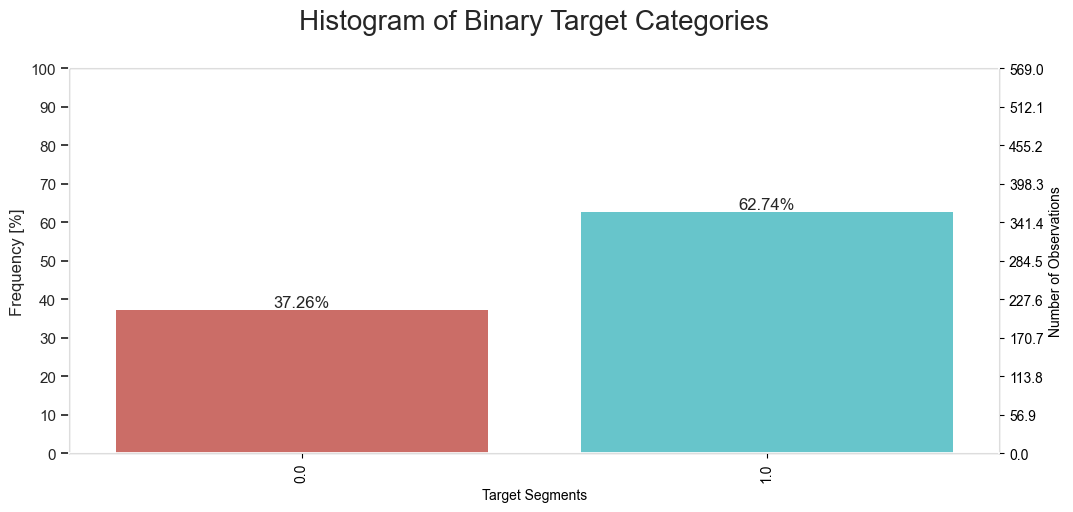

In [14]:
images_path = "./graphs/"
histogram(df_cancer, "target", save_fig=True, path= images_path)

## Data Analysis

In [15]:
# Split the data into train, test sets
from sklearn.model_selection import train_test_split
X = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### Outliers Detection

In [16]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + (1.5 * interquartile_range)
    low_limit = quartile1 - (1.5 * interquartile_range)
    return low_limit, up_limit

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [18]:
for col in numerical_cols:
    print(col, check_outlier(X_train, col))

mean radius True
mean texture True
mean perimeter True
mean area True
mean smoothness True
mean compactness True
mean concavity True
mean concave points True
mean symmetry True
mean fractal dimension True
radius error True
texture error True
perimeter error True
area error True
smoothness error True
compactness error True
concavity error True
concave points error True
symmetry error True
fractal dimension error True
worst radius True
worst texture True
worst perimeter True
worst area True
worst smoothness True
worst compactness True
worst concavity True
worst concave points False
worst symmetry True
worst fractal dimension True


In [19]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [20]:
for col in numerical_cols:
  grab_outliers(X_train, col, index=True)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
461        27.42         26.27           186.9     2501.0          0.10840   
272        21.75         20.99           147.3     1491.0          0.09401   
521        24.63         21.60           165.5     1841.0          0.10300   
122        24.25         20.20           166.2     1761.0          0.14470   
108        22.27         19.67           152.8     1509.0          0.13260   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
461            0.1988          0.3635               0.1689         0.2061   
272            0.1961          0.2195               0.1088         0.1721   
521            0.2106          0.2310               0.1471         0.1991   
122            0.2867          0.4268               0.2012         0.2655   
108            0.2768          0.4264               0.1823         0.2556   

     mean fractal dimension  ...  worst radius  worst texture  \
461

In [21]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [22]:
for col in numerical_cols:
    replace_with_thresholds(X_train, col)

In [23]:
for col in numerical_cols:
    print(col, check_outlier(X_train, col))

mean radius False
mean texture False
mean perimeter False
mean area False
mean smoothness False
mean compactness False
mean concavity False
mean concave points False
mean symmetry False
mean fractal dimension False
radius error False
texture error False
perimeter error False
area error False
smoothness error False
compactness error False
concavity error False
concave points error False
symmetry error False
fractal dimension error False
worst radius False
worst texture False
worst perimeter False
worst area False
worst smoothness False
worst compactness False
worst concavity False
worst concave points False
worst symmetry False
worst fractal dimension False


## Data Visualization

In [24]:
import os

def num_summary(dataframe, col_name, plot=False, savefig=False, path=None):
    """
    It gives the summary of numerical columns with a plot.

    Args:
        dataframe (dataframe): The dataframe from which variables names are to be retrieved.
        col_name (string): The column names from which features names are to be retrieved
        plot (bool, optional): Plot the figure of the specified column. Defaults to False.
        savefig(bool, optional): Save the figure of the specific column to the folder. Defaults to False
        path (string, optional): Path to save the figure. Defaults to None.

    """
    
    # if path not exist, create a folder
    if path is not None:
        if not os.path.exists(path):
            os.makedirs(path)
    
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
        dataframe[col_name].hist()
        plt.xlabel(col_name)
        plt.title("{} Histogram Graph.png".format(col_name.capitalize()))
        if savefig:
            plt.savefig(path + "{}_hist.png".format(col_name))
        plt.show(block=True)

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
5%         9.529200
10%       10.260000
20%       11.366000
30%       12.012000
40%       12.726000
50%       13.370000
60%       14.058000
70%       15.056000
80%       17.068000
90%       19.530000
95%       20.576000
99%       24.371600
max       28.110000
Name: mean radius, dtype: float64


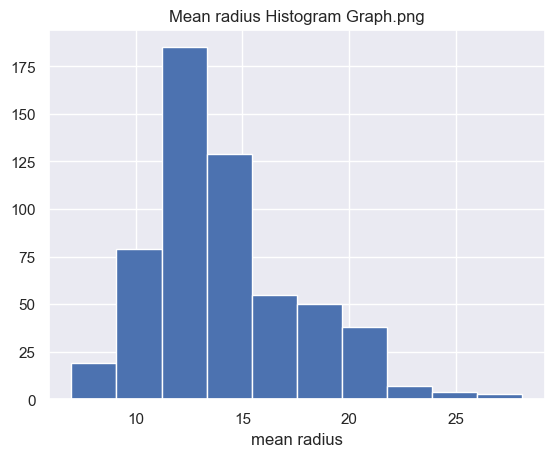

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
5%        13.088000
10%       14.078000
20%       15.656000
30%       16.840000
40%       17.912000
50%       18.840000
60%       19.968000
70%       21.272000
80%       22.440000
90%       24.992000
95%       27.150000
99%       30.652000
max       39.280000
Name: mean texture, dtype: float64


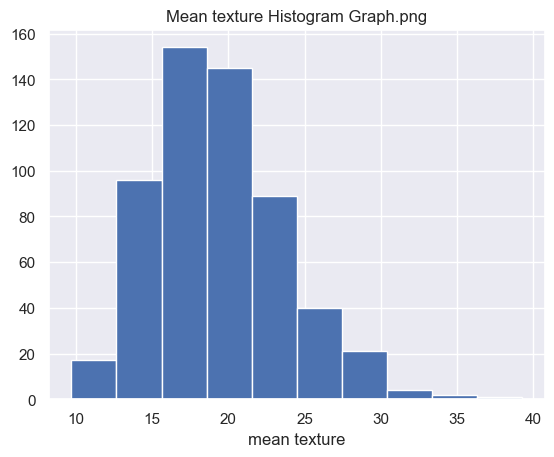

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
5%        60.496000
10%       65.830000
20%       73.292000
30%       77.360000
40%       81.938000
50%       86.240000
60%       91.420000
70%       98.200000
80%      111.680000
90%      129.100000
95%      135.820000
99%      165.724000
max      188.500000
Name: mean perimeter, dtype: float64


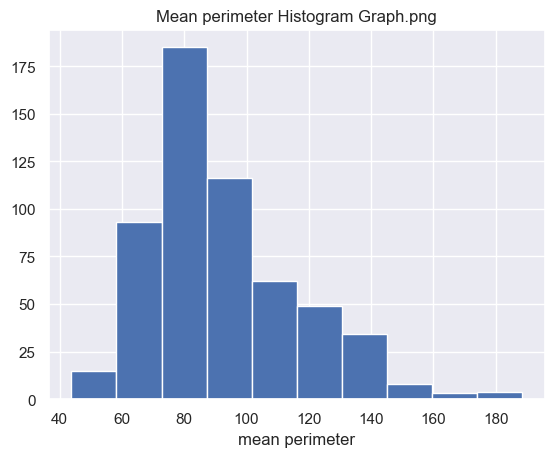

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
5%        275.780000
10%       321.600000
20%       396.560000
30%       444.060000
40%       496.440000
50%       551.100000
60%       609.740000
70%       700.660000
80%       915.060000
90%      1177.400000
95%      1309.800000
99%      1786.600000
max      2501.000000
Name: mean area, dtype: float64


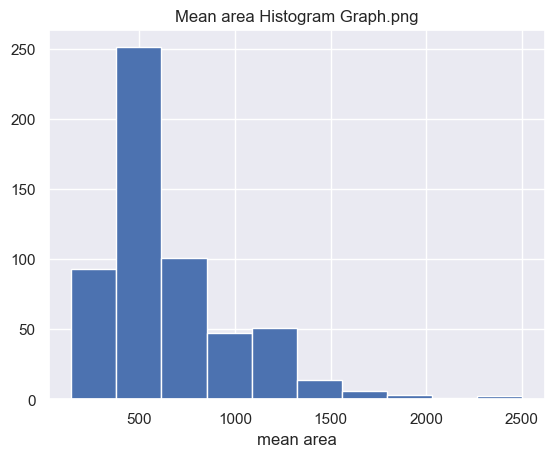

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
5%         0.075042
10%        0.079654
20%        0.084206
30%        0.087914
40%        0.091828
50%        0.095870
60%        0.099338
70%        0.103260
80%        0.107500
90%        0.114820
95%        0.118780
99%        0.132888
max        0.163400
Name: mean smoothness, dtype: float64


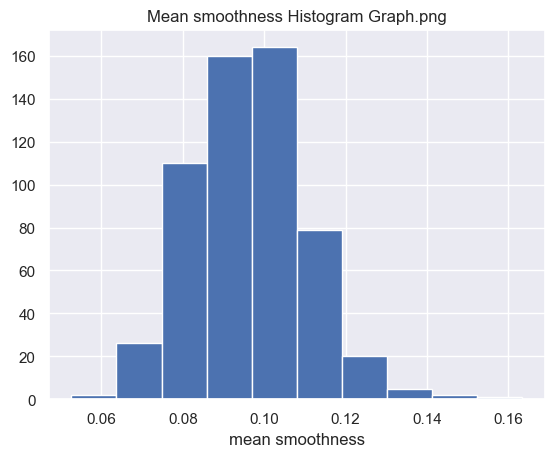

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
5%         0.040660
10%        0.049700
20%        0.059638
30%        0.070390
40%        0.079530
50%        0.092630
60%        0.108740
70%        0.122420
80%        0.141900
90%        0.175460
95%        0.208700
99%        0.277192
max        0.345400
Name: mean compactness, dtype: float64


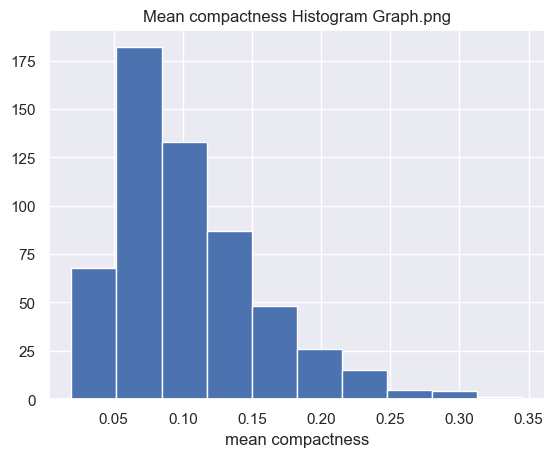

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
5%         0.004983
10%        0.013686
20%        0.024930
30%        0.034400
40%        0.045070
50%        0.061540
60%        0.086212
70%        0.111920
80%        0.149780
90%        0.203040
95%        0.243020
99%        0.351688
max        0.426800
Name: mean concavity, dtype: float64


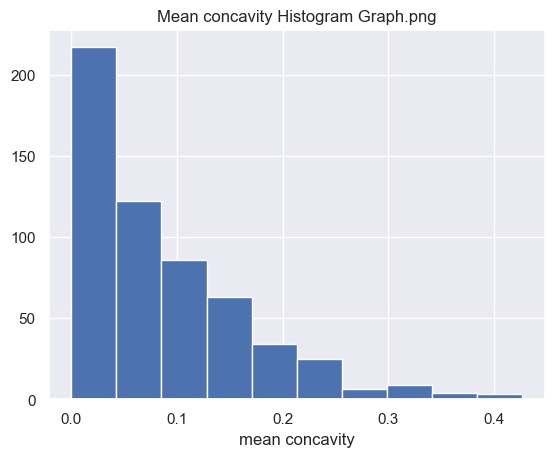

count    569.000000
mean       0.048919
std        0.038803
min        0.000000
5%         0.005621
10%        0.011158
20%        0.017866
30%        0.022788
40%        0.027982
50%        0.033500
60%        0.048318
70%        0.064496
80%        0.084254
90%        0.100420
95%        0.125740
99%        0.164208
max        0.201200
Name: mean concave points, dtype: float64


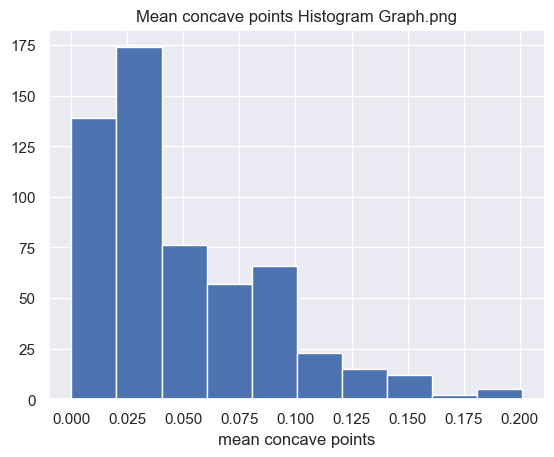

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
5%         0.141500
10%        0.149580
20%        0.158760
30%        0.165080
40%        0.172000
50%        0.179200
60%        0.185480
70%        0.192800
80%        0.200540
90%        0.214940
95%        0.230720
99%        0.259564
max        0.304000
Name: mean symmetry, dtype: float64


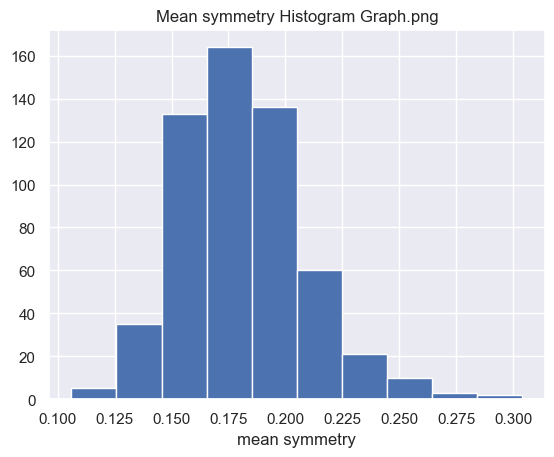

count    569.000000
mean       0.062798
std        0.007060
min        0.049960
5%         0.053926
10%        0.055338
20%        0.056864
30%        0.058840
40%        0.060204
50%        0.061540
60%        0.063148
70%        0.065048
80%        0.067630
90%        0.072266
95%        0.076090
99%        0.085438
max        0.097440
Name: mean fractal dimension, dtype: float64


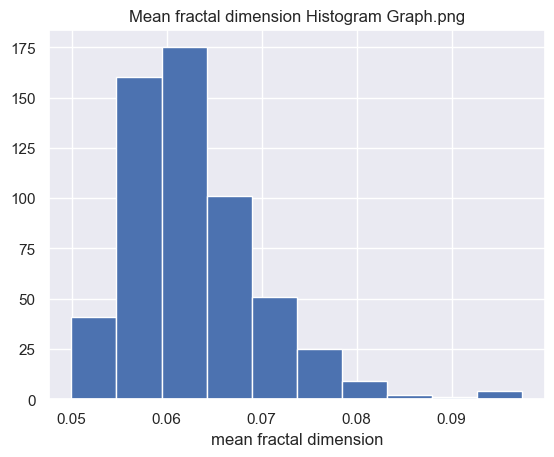

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
5%         0.160100
10%        0.183080
20%        0.219280
30%        0.246040
40%        0.280200
50%        0.324200
60%        0.369460
70%        0.431020
80%        0.546140
90%        0.748880
95%        0.959520
99%        1.291320
max        2.873000
Name: radius error, dtype: float64


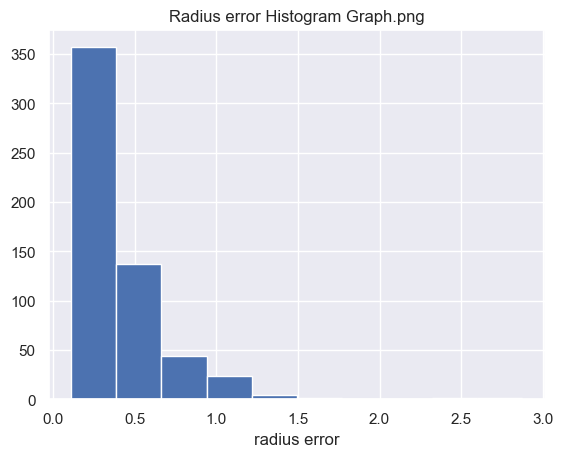

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
5%         0.540140
10%        0.640400
20%        0.780600
30%        0.902100
40%        1.005200
50%        1.108000
60%        1.238800
70%        1.388200
80%        1.561200
90%        1.909400
95%        2.212000
99%        2.915440
max        4.885000
Name: texture error, dtype: float64


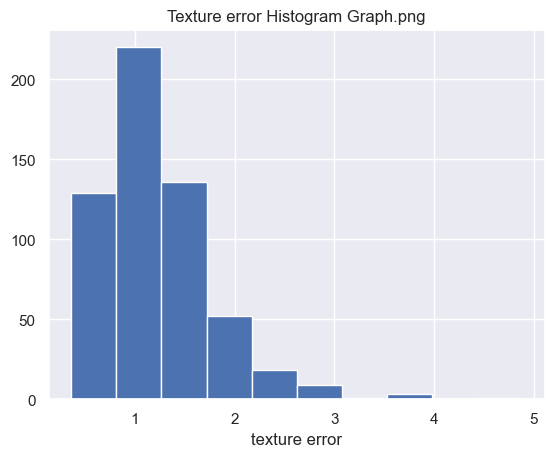

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
5%         1.132800
10%        1.280200
20%        1.516600
30%        1.740800
40%        2.039400
50%        2.287000
60%        2.590800
70%        3.050200
80%        3.767800
90%        5.123200
95%        7.041600
99%        9.690040
max       21.980000
Name: perimeter error, dtype: float64


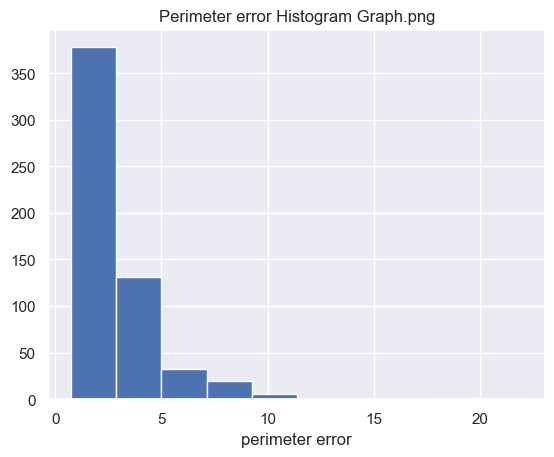

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
5%        11.360000
10%       13.160000
20%       16.640000
30%       19.038000
40%       21.078000
50%       24.530000
60%       29.322000
70%       38.430000
80%       54.088000
90%       91.314000
95%      115.800000
99%      177.684000
max      542.200000
Name: area error, dtype: float64


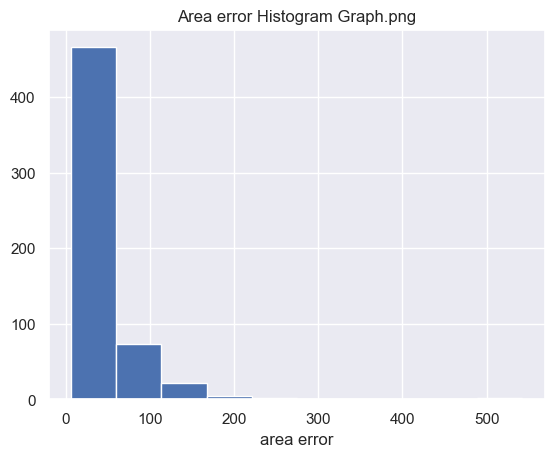

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
5%         0.003690
10%        0.004224
20%        0.004871
30%        0.005417
40%        0.005843
50%        0.006380
60%        0.006944
70%        0.007773
80%        0.008828
90%        0.010410
95%        0.012644
99%        0.017258
max        0.031130
Name: smoothness error, dtype: float64


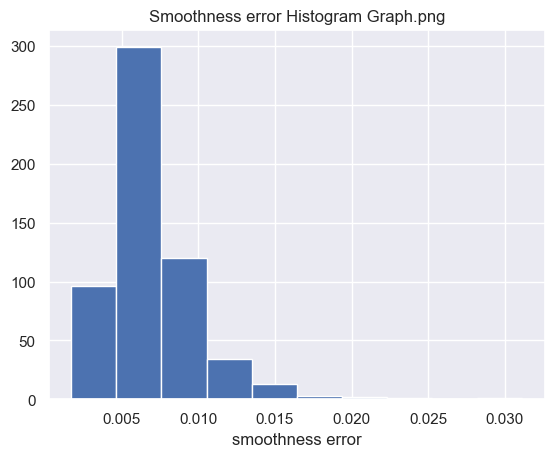

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
5%         0.007892
10%        0.009169
20%        0.011800
30%        0.014240
40%        0.017020
50%        0.020450
60%        0.024480
70%        0.030136
80%        0.036198
90%        0.047602
95%        0.060578
99%        0.089872
max        0.135400
Name: compactness error, dtype: float64


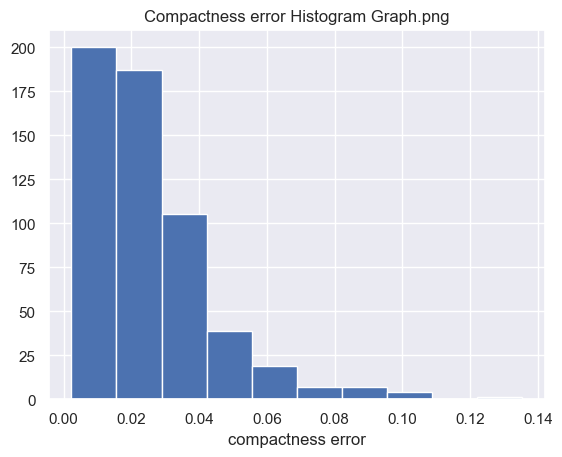

count    569.000000
mean       0.031894
std        0.030186
min        0.000000
5%         0.003253
10%        0.007726
20%        0.013212
30%        0.016980
40%        0.020456
50%        0.025890
60%        0.030544
70%        0.037362
80%        0.046404
90%        0.058520
95%        0.078936
99%        0.122292
max        0.396000
Name: concavity error, dtype: float64


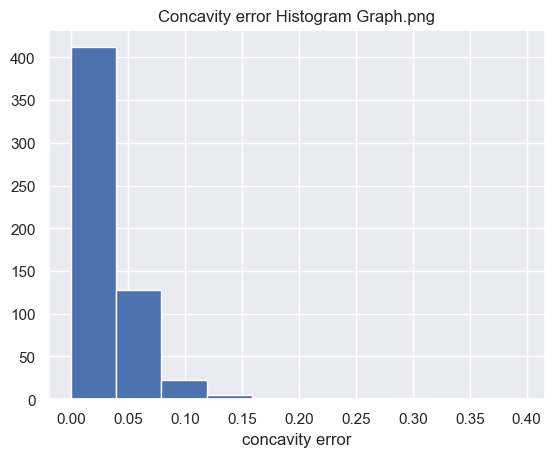

count    569.000000
mean       0.011796
std        0.006170
min        0.000000
5%         0.003831
10%        0.005493
20%        0.006893
30%        0.008465
40%        0.009617
50%        0.010930
60%        0.012410
70%        0.013700
80%        0.015812
90%        0.018688
95%        0.022884
99%        0.031194
max        0.052790
Name: concave points error, dtype: float64


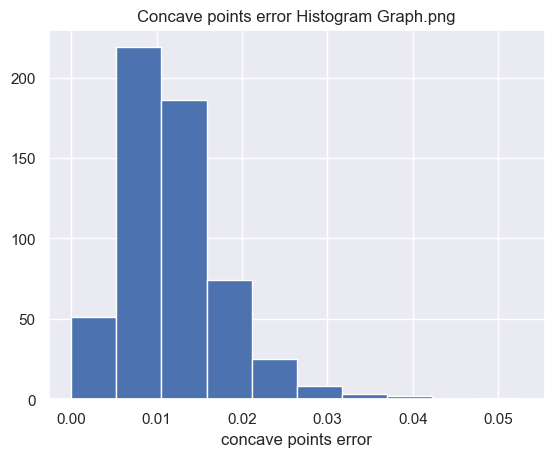

count    569.000000
mean       0.020542
std        0.008266
min        0.007882
5%         0.011758
10%        0.013012
20%        0.014540
30%        0.015704
40%        0.017170
50%        0.018730
60%        0.020066
70%        0.021978
80%        0.025680
90%        0.030120
95%        0.034988
99%        0.052208
max        0.078950
Name: symmetry error, dtype: float64


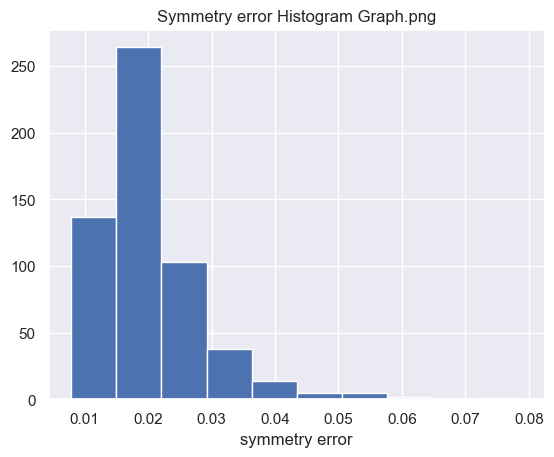

count    569.000000
mean       0.003795
std        0.002646
min        0.000895
5%         0.001522
10%        0.001710
20%        0.002057
30%        0.002382
40%        0.002752
50%        0.003187
60%        0.003611
70%        0.004172
80%        0.004830
90%        0.006185
95%        0.007960
99%        0.012650
max        0.029840
Name: fractal dimension error, dtype: float64


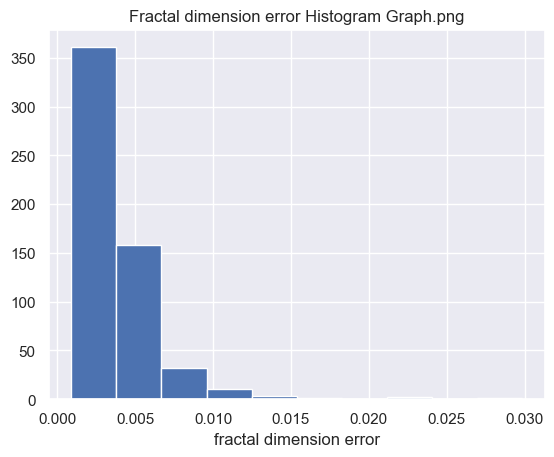

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
5%        10.534000
10%       11.234000
20%       12.498000
30%       13.314000
40%       14.008000
50%       14.970000
60%       16.004000
70%       17.386000
80%       20.294000
90%       23.682000
95%       25.640000
99%       30.762800
max       36.040000
Name: worst radius, dtype: float64


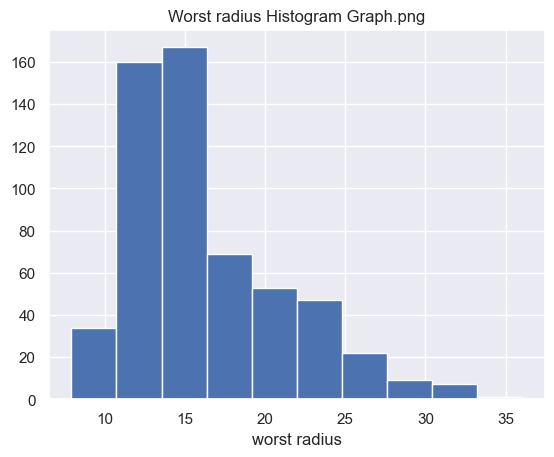

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
5%        16.574000
10%       17.800000
20%       20.176000
30%       21.988000
40%       23.584000
50%       25.410000
60%       26.724000
70%       28.460000
80%       30.908000
90%       33.646000
95%       36.300000
99%       41.802400
max       49.540000
Name: worst texture, dtype: float64


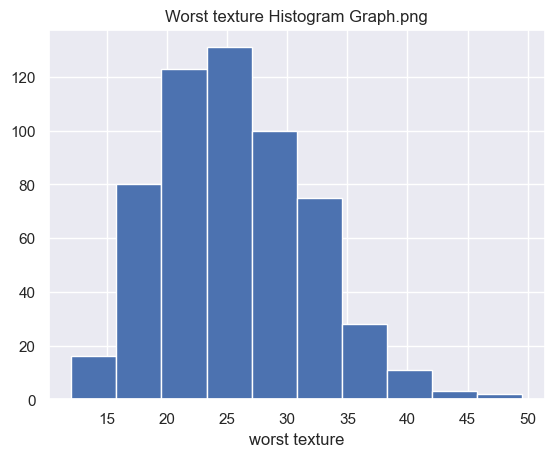

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
5%        67.856000
10%       72.178000
20%       81.402000
30%       86.328000
40%       91.304000
50%       97.660000
60%      105.740000
70%      115.900000
80%      133.500000
90%      157.740000
95%      171.640000
99%      208.304000
max      251.200000
Name: worst perimeter, dtype: float64


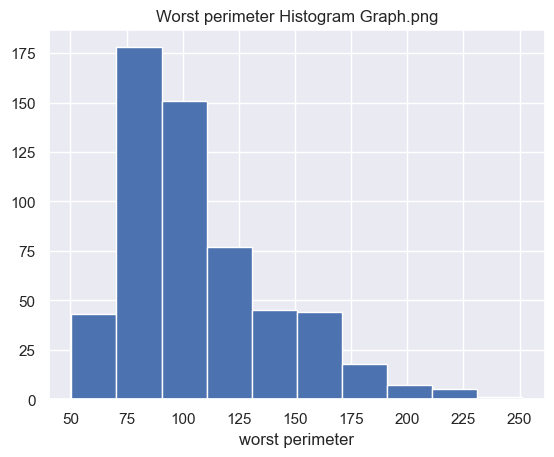

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
5%        331.060000
10%       384.720000
20%       475.980000
30%       544.140000
40%       599.700000
50%       686.500000
60%       781.180000
70%       926.960000
80%      1269.000000
90%      1673.000000
95%      2009.600000
99%      2918.160000
max      4254.000000
Name: worst area, dtype: float64


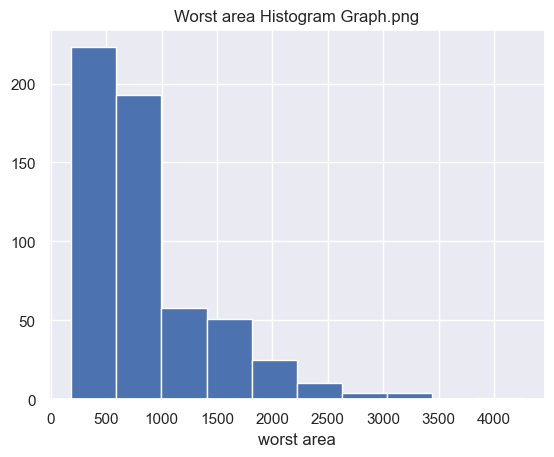

count    569.000000
mean       0.132369
std        0.022832
min        0.071170
5%         0.095734
10%        0.102960
20%        0.112520
30%        0.120740
40%        0.126320
50%        0.131300
60%        0.137680
70%        0.142600
80%        0.150080
90%        0.161480
95%        0.171840
99%        0.188908
max        0.222600
Name: worst smoothness, dtype: float64


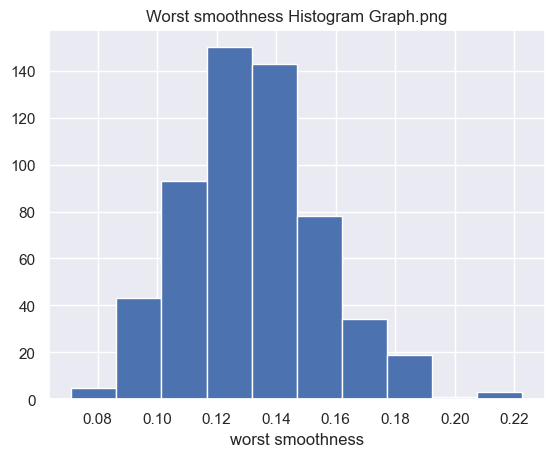

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
5%         0.071196
10%        0.093676
20%        0.125660
30%        0.161400
40%        0.184620
50%        0.211900
60%        0.251400
70%        0.303960
80%        0.367060
90%        0.447840
95%        0.564120
99%        0.778644
max        1.058000
Name: worst compactness, dtype: float64


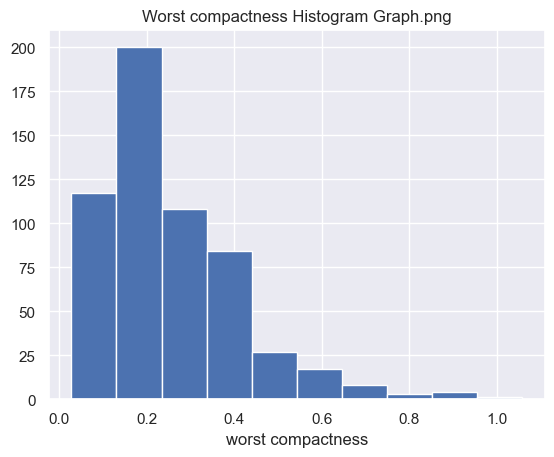

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
5%         0.018360
10%        0.045652
20%        0.091974
30%        0.136880
40%        0.177180
50%        0.226700
60%        0.286600
70%        0.349920
80%        0.419540
90%        0.571320
95%        0.682380
99%        0.902380
max        1.252000
Name: worst concavity, dtype: float64


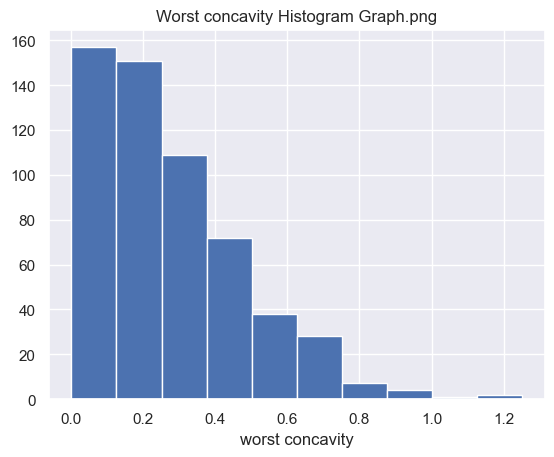

count    569.000000
mean       0.114606
std        0.065732
min        0.000000
5%         0.024286
10%        0.038460
20%        0.058086
30%        0.071656
40%        0.083914
50%        0.099930
60%        0.121800
70%        0.150800
80%        0.177540
90%        0.208940
95%        0.236920
99%        0.269216
max        0.291000
Name: worst concave points, dtype: float64


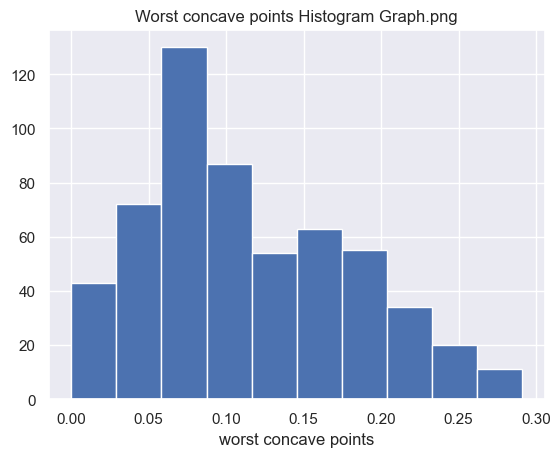

count    569.000000
mean       0.290076
std        0.061867
min        0.156500
5%         0.212700
10%        0.226120
20%        0.243620
30%        0.256520
40%        0.269400
50%        0.282200
60%        0.296480
70%        0.310220
80%        0.325380
90%        0.360080
95%        0.406160
99%        0.486908
max        0.663800
Name: worst symmetry, dtype: float64


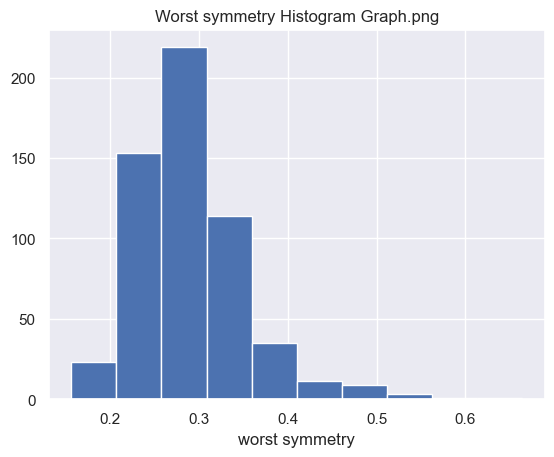

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
5%         0.062558
10%        0.065792
20%        0.069654
30%        0.073462
40%        0.076852
50%        0.080040
60%        0.083202
70%        0.088984
80%        0.095934
90%        0.106320
95%        0.119520
99%        0.140628
max        0.207500
Name: worst fractal dimension, dtype: float64


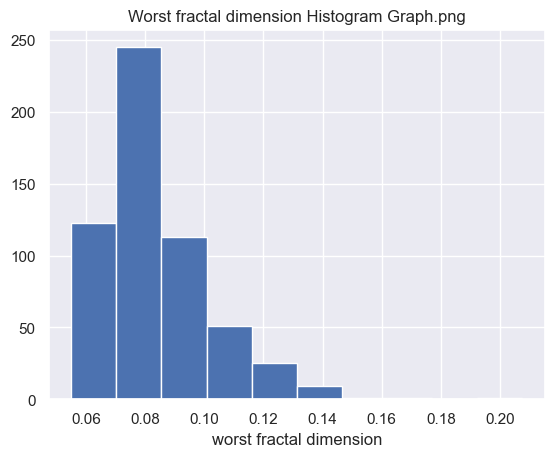

In [25]:
for col in numerical_cols:
    num_summary(df_cancer, col, plot=True, savefig=True, path=images_path)

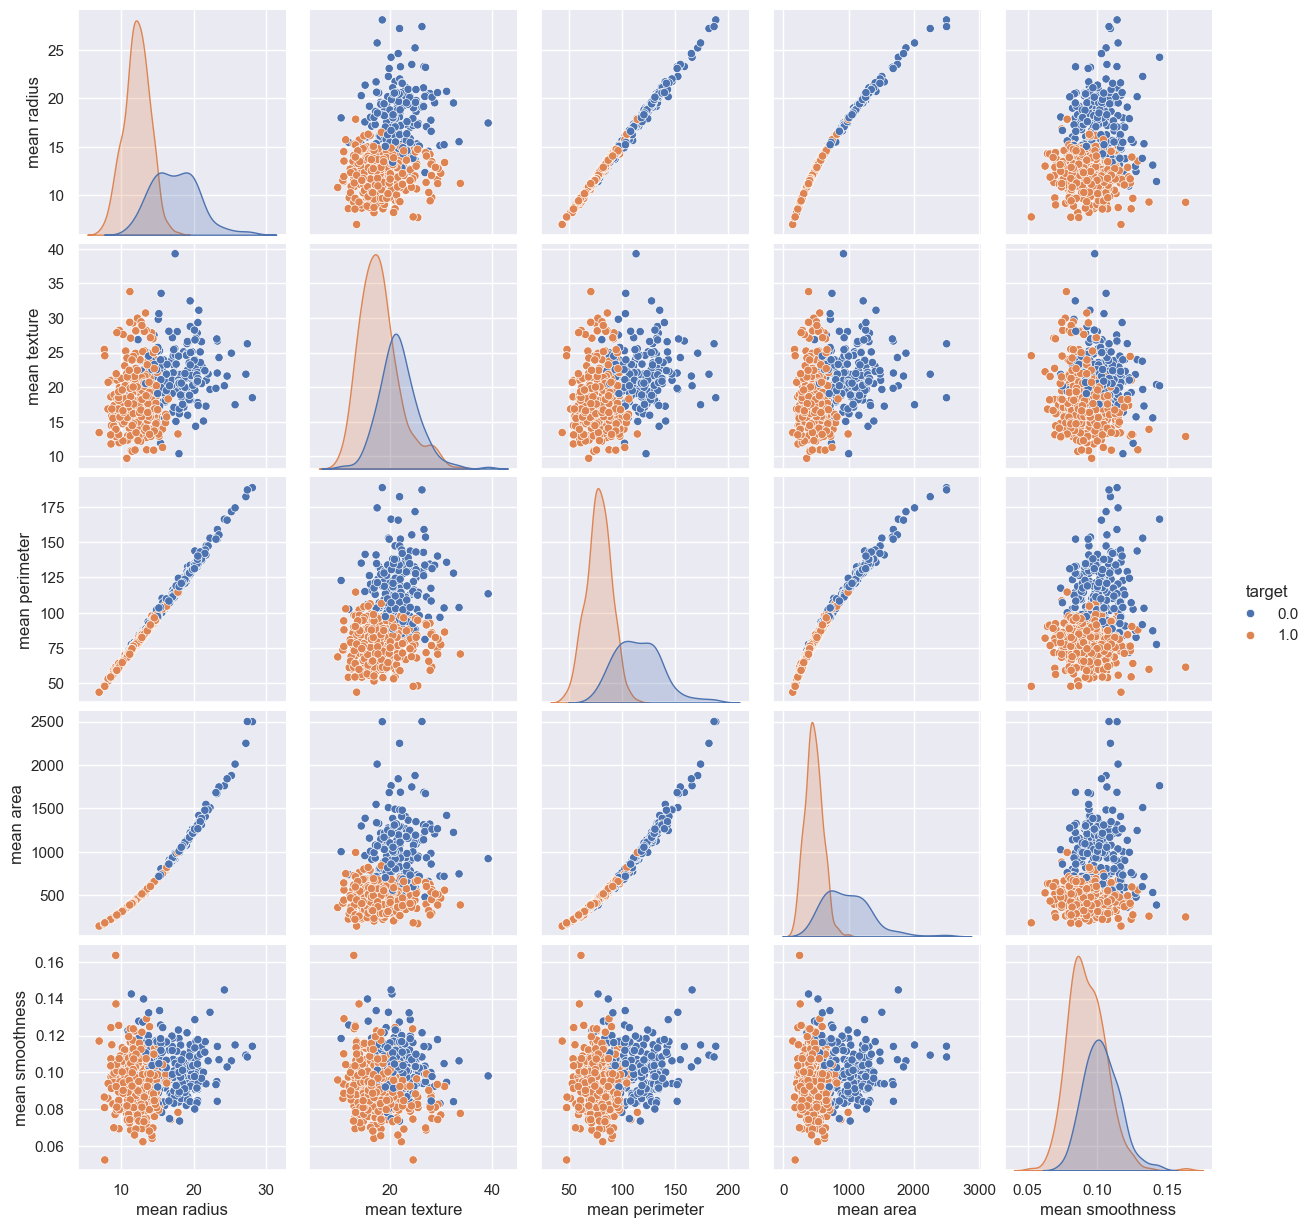

In [26]:
sns.pairplot(df_cancer, hue="target", vars=["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness"])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

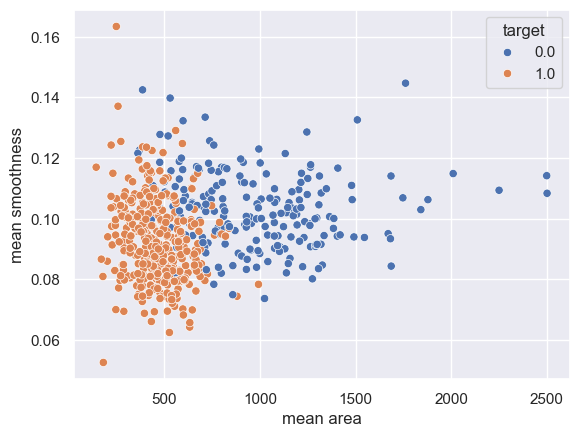

In [27]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

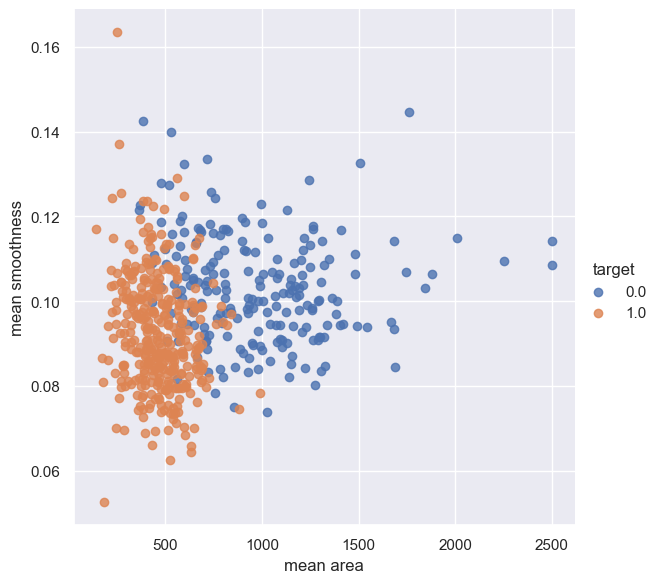

In [28]:
sns.lmplot(x="mean area", y="mean smoothness", hue="target", data=df_cancer, fit_reg=False, height=6)

<Axes: >

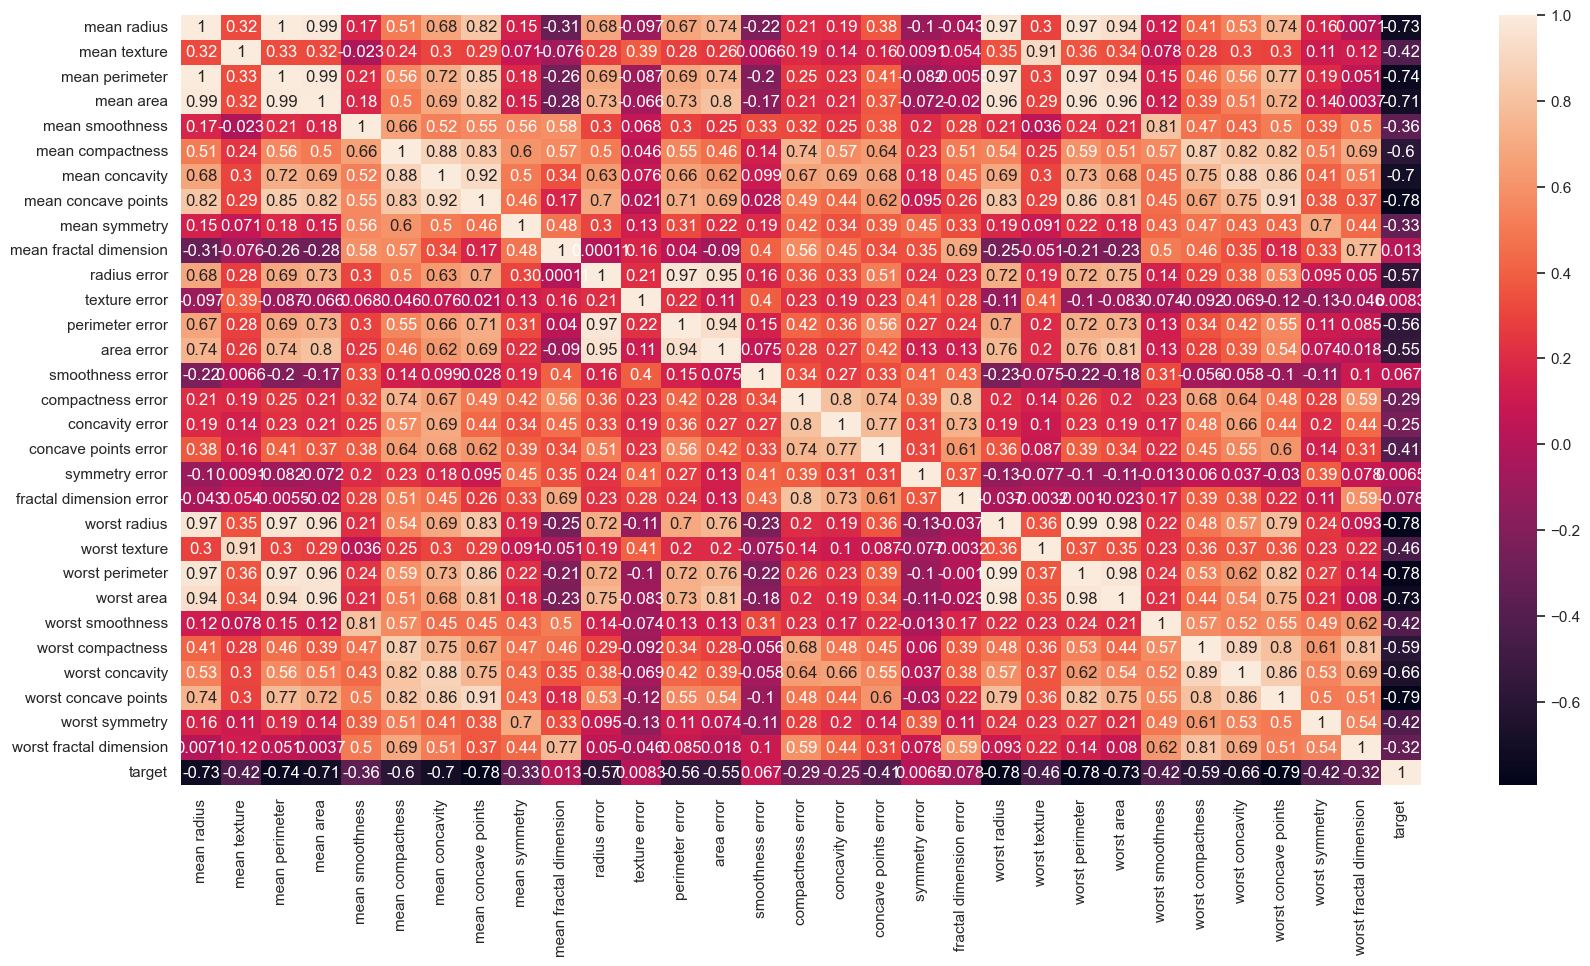

In [29]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df_cancer.corr(), annot=True) 

## Modeling

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)


SVC()

## Evaluation

In [32]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

<Axes: >

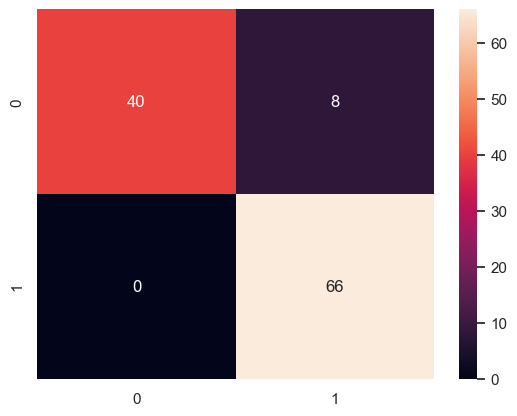

In [33]:
sns.heatmap(cm, annot=True)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



## Hyperparameter Tunning

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear','rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

<Axes: >

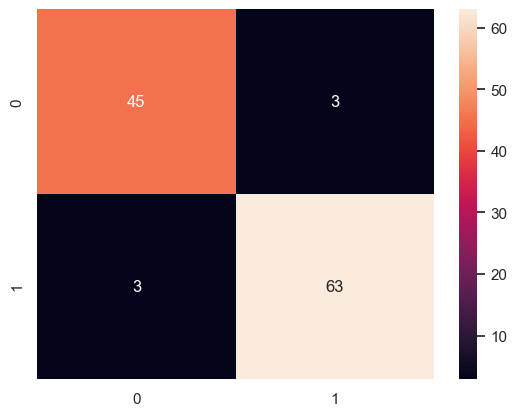

In [36]:
grid_predictions = grid_search.predict(X_test)

cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        48
         1.0       0.95      0.95      0.95        66

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [39]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear','rbf']
}

random_search = RandomizedSearchCV(SVC(), param_grid, refit=True, verbose=4)
random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.934 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.901 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.978 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.967 total time=   1.1s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;

{'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}

<Axes: >

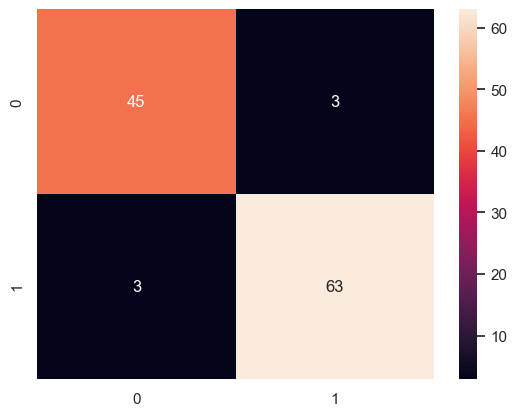

In [40]:
random_predictions = random_search.predict(X_test)

cm = confusion_matrix(y_test, random_predictions)

sns.heatmap(cm, annot=True)

In [41]:
print(classification_report(y_test, random_predictions))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        48
         1.0       0.95      0.95      0.95        66

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

